# Markov Zincirleri

# Markov Zincirleri

# Markov Zincirleri

In [44]:
import numpy as np
import matplotlib.pyplot as plt

💫 Hayal et ki senin ve kedinin bir süper gücü var: ışınlanma gücü 💫

🐱 Kediniz Emily oldukça genç ve süper gücünü yeni keşfediyor.

Bu gücü sadece üç şehir arasında kullanabiliyor:
- 🇫🇷 Paris
- 🇬🇧 London
- 🇩🇪 Berlin

Ve kendini günde sadece bir kez bir şehirden diğerine ışınlayabiliyor!

😱 Workintech’in Data Science challenge’larına o kadar odaklandın ki, Emily’nin nereye gittiğini fark etmeden kaybettin.

👉 Yine de, biraz içgüdüsel olarak şunları “biliyorsun”:

-Paris’teyse, yarın:
  - 1/3 olasılıkla Paris’te kalacak
  - 1/3 olasılıkla London’a gidecek
  - 1/3 olasılıkla Berlin’e gidecek

- London’daysa, yarın:
  - %35 olasılıkla Paris’e gidecek
  - %35 olasılıkla London’da kalacak
  - %30 olasılıkla Berlin’e gidecek

- Berlin’deyse, yarın:
  - %15 olasılıkla Paris’e gidecek
  - %20 olasılıkla London’a gidecek
  - %65 olasılıkla Berlin’de kalacak

## 🐱 1) Kedinin hareketini modellemek

### 1.1) Draft

✍️ Emily’nin hareketlerini görselleştirmek için bir kalem ve bir kâğıt al.

<details>
   <summary>👀 Bu Markov Chain’in görsel gösterimi (önce kendin yapmayı dene!)</summary>

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/markov_chains.png">

</details>

### ✈️ 1.2) Transitions

["paris", "london", "berlin"] şehirleri arasındaki hareketleri temsil eden[`transition_matrix`](https://en.wikipedia.org/wiki/Stochastic_matrix) yani geçiş matrisini senin için oluşturacağız.


Eğer bir zaman adımında i durumundan j durumuna geçiş olasılığı  $P(j|i) = P_{i,j}$, ise, geçiş matrisi Q, bu olasılıkları satır–sütun elemanları olarak kullanarak aşağıdaki şekilde tanımlanır: $P_{i,j}$ 

$${\begin{bmatrix}P_{1,1}&P_{1,2}&\dots &P_{1,j}&\dots &P_{1,S}\\P_{2,1}&P_{2,2}&\dots &P_{2,j}&\dots &P_{2,S}\\\vdots &\vdots &\ddots &\vdots &\ddots &\vdots \\P_{i,1}&P_{i,2}&\dots &P_{i,j}&\dots &P_{i,S}\\\vdots &\vdots &\ddots &\vdots &\ddots &\vdots \\P_{S,1}&P_{S,2}&\dots &P_{S,j}&\dots &P_{S,S}\\\end{bmatrix}}$$

Emily için geçiş matrisi şu şekilde olacaktır:

$${\begin{bmatrix}
P_{Paris \rightarrow Paris}&P_{Paris \rightarrow London} &P_{Paris \rightarrow Berlin}\\
P_{London \rightarrow Paris}&P_{London \rightarrow London}&P_{London \rightarrow Berlin}\\
P_{Berlin \rightarrow Paris}&P_{Berlin \rightarrow London}&P_{Berlin \rightarrow Berlin}\\
\end{bmatrix}}$$

In [45]:
Q = np.array([
    [1/3,1/3,1/3],
    [0.35,0.35,0.3],
    [0.15,0.2,0.65]])
display(Q.shape)
display(Q)

(3, 3)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.35      , 0.35      , 0.3       ],
       [0.15      , 0.2       , 0.65      ]])

**`stochastic matrixes`** olarak da adlandırılan bu matrislerin dikkat çekici bir özelliği vardır:
Her satır bir olasılık vektörüdür **`probability vector`** , yani katsayılarının toplamı 1 = %100 eder.

👉 Emily’nin başlangıçta Paris’te olduğunu hayal edelim.
Bu bilgiyi saklamak için (1 satır × 3 sütun) boyutunda bir initial_position array oluşturacağız.

In [46]:
initial_position = np.array([[1,0,0]])
display(initial_position)
print("shape:", initial_position.shape)

array([[1, 0, 0]])

shape: (1, 3)


❓ Emily’nin bir sonraki adımda paris/london/berlin’de olma olasılığı nedir?
Bunu hesaplamayı dene; şu ikisi arasında dot product kullanarak:
`Q` matrisinin bazı slice’ları ve `initial_position`

In [47]:
proba_paris_to_paris = initial_position.dot(Q[:,0])
proba_paris_to_london = initial_position.dot(Q[:,1])
proba_paris_to_berlin = initial_position.dot(Q[:,2])
proba_paris_to_paris

array([0.33333333])

<details>
    <summary>Answer</summary>

```python
proba_paris_to_paris = initial_position.dot(Q[:,0])
proba_paris_to_london = initial_position.dot(Q[:,1])
proba_paris_to_berlin = initial_position.dot(Q[:,2])
```
    
</details>

ℹ️ Şimdi, kedinin en son nerede görüldüğünü bilmiyorsun ama bir başlangıç tahminin var: Emily başlangıçta
 -Paris’te olma olasılığı %30
 -Londra’da olma olasılığı %40
-Berlin’de olma olasılığı %30

❓ Bu olasılıkları kullanarak (1,3) boyutunda `initial_position` array’ini oluştur.

In [48]:
initial_position=np.array([[0.3, 0.4, 0.3]])
display(initial_position)
print("shape:", initial_position.shape)

array([[0.3, 0.4, 0.3]])

shape: (1, 3)


❓Kedinin 1. günde her şehirde olma olasılıklarını veren $ (1,3) $ boyutundaki `day_1` array’ini, şık bir matematiksel formülle hesapla ❓

<br>

<details>
    <summary markdown='span'>👀 Hints</summary>

Matris çarpımını gözünde canlandır:
<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/vector_dot_matrix.jpeg'>
</details>

In [49]:
day_1=initial_position.dot(Q)
np.round(day_1,3)

array([[0.285, 0.3  , 0.415]])

<details>
    <summary markdown='span'>Answer</summary>

📚 To compute the (1,3) probabilities of the cat being in each city on ***day 1***:, you can matrix-multiply the (1,3) `initial_position` by the (3,3) `transition_matrix`!

👉 We will admit this ***update rule*** for this challenge, but try to convince yourself why it's the case by playing around in various simple cases!
    
🤓 If you really want more explanations about this update rule, you can check [Cambridge University - Markov Chains](http://www.statslab.cam.ac.uk/~rrw1/markov/M.pdf) but that is clearly not the goal of this bootcamp. So just accept the rule - trust us - and follow the notebook step-by-step.
    
</details>

❓ Emily’nin 2. günde Paris’te olma olasılığı nedir? Peki ya Londra ve Berlin için olasılıklar nedir? ❓

In [50]:
day_2=day_1.dot(Q)
np.round(day_2,3)

array([[0.262, 0.283, 0.455]])

### ⏳ 1.3) Kedi *n* gün sonra nerede olur? 

❓ emily adında bir fonksiyon oluştur. Bu fonksiyon, Emily’nin n gün sonra Paris, Berlin ve Londra’da olma olasılıklarını hesaplamalı. ❓

* `Inputs` : `initial_position`, `transition_matrix` ve `n_days`
* `Output` : her şehrin olasılıklarını içeren bir vektör

In [51]:
def emily(initial_position, transition_matrix, n_days):
    output=initial_position.copy()
    for i in range(n_days):
        output=output.dot(transition_matrix)
    return output

    

❓ Peki, Emily 100 gün sonra nerede olacak? ❓

In [52]:
day_100=emily(initial_position, Q, 100)
np.round(day_100,3)

array([[0.251, 0.275, 0.474]])

### 📈 1.4) Zaman İçinde Olasılıkların Görselleştirilmesi

❓ Zaman içinde her şehirde olma olasılıklarını gösteren bir grafik çiz

😉 Bu son soru yönlendirmesiz!

In [55]:
def emily_over_time(initial_position, transition_matrix, n_days):
    paris=[]
    london=[]
    berlin=[]
    for n in range(n_days):
        t=emily(initial_position, transition_matrix, n)[0]
        paris.append(t[0])
        london.append(t[1])
        berlin.append(t[2])

     
    with plt.style.context("fast"):
        ### figsize
        plt.figure(figsize=(10,6))
        ### getting the ax
        ax = plt.gca()
        ### One plot per city
        ax.plot(range(1,n_days+1), paris, color="blue",linestyle=":",marker="D",label="Paris")
        ax.plot(range(1,n_days+1), london, color="red",linestyle=":",marker="o",label="London")
        ax.plot(range(1,n_days+1), berlin, color="orange",linestyle=":",marker="X",label="Berlin")

        ### Additional Customisation
        ax.legend(loc="best")
        ax.set_title('Probabilities of the movements over time')
        ax.grid(axis="x",linewidth=0.5)
        ax.grid(axis="y",linewidth=0.5)
        plt.show()
        

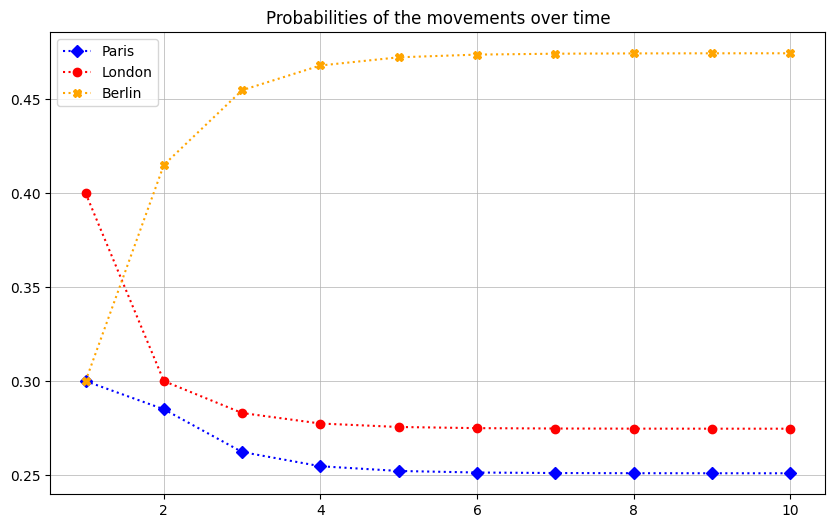

In [56]:
n_days = 10
initial_position = np.array([[0.30,0.40,0.30]])
Q = np.array([
    [1/3,1/3,1/3],
    [0.35,0.35,0.3],
    [0.15,0.2,0.65]])

emily_over_time(initial_position, Q, n_days)

In [59]:
def emily_over_time(initial_position, transition_matrix, n_days):
    # $CHALLENGIFY_BEGIN
    paris = []
    london = []
    berlin = []

    ## Computing the probabilities each day
    for n in range(n_days):
        tmp = emily(initial_position, transition_matrix, n)[0]
        paris.append(tmp[0])
        london.append(tmp[1])
        berlin.append(tmp[2])



None


## 🥡 2) Takeaways

❤️ `Emily in Paris`,dizisinden sonra, uzun vadede muhtemelen `Emily in Berlin` göreceğiz!

❗️ *** Her Markov Zinciri kararlı bir duruma yakınsamak zorunda değildir!*** THer gün, kesin olarak 1 olasılıkla iki durum (0 ve 1) arasında gidip gelen bir hamster düşün — asla sabit bir dağılıma ulaşmaz!

💡 Biliyor muydun?
-Google, bir sayfadan diğer sayfalara tıklama olasılığını hesaplar!
-Arama motorunun gizli algoritması Markov Zincirleri üzerine kuruludur (ve elbette Google kurucularını milyarder yapan ileri düzey iyileştirmeler de vardır...).
- 📚 `Google Arama Motoru` : [Analytics Vidhya article - Google Page Rank and Markov Chains](https://medium.com/analytics-vidhya/google-page-rank-and-markov-chains-d65717b98f9c)


🏁 Tebrikler!

💾 `git add/commit/push` yapmayı unutma.

😁 Markov Zincirleri hâlâ tam olarak net değilse panik yapma.
Bu challenge, konuya bir giriş niteliğindeydi; bir Data Analyst veya Junior Data Scientist olarak genelde bu konuyu derinlemesine kullanmana gerek olmayacak :)

🥳 Bunu, Lineer Cebir araçlarını (matrisler gibi) ve Olasılık Teorisi araçlarını (olasılık dağılımları gibi) pratik etmek için güzel bir fırsat olarak düşünebilirsin!